In [ ]:
#import python dependencies
# !pip install tensorflow
!pip install -U -q PyDrive
import tensorflow as tf
import pandas as pd
import numpy as np
import json
import cv2
import os
from glob import glob
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/FinalProjectData/Data/TACO/")
os.listdir()

['README.md',
 '.gitignore',
 'demo.ipynb',
 'all_image_urls.csv',
 'LICENSE',
 'annotations_unofficial.json',
 'annotations.json',
 'requirements.txt',
 'download.py',
 'detector',
 '.git',
 'map_1.csv',
 'map_2.csv',
 'map_3.csv',
 'map_4.csv',
 'map_10.csv',
 'map_17.csv',
 '.ipynb_checkpoints',
 'fotos',
 'answers.joblib',
 'asd.gv',
 'asd.gv.pdf',
 'results.csv',
 'tiago_cache',
 'list_of_x_train.pickle',
 'list_of_y_train.pickle',
 'list_of_x_test.pickle',
 'list_of_y_test.pickle',
 'list_of_x_train_xception.pickle',
 'list_of_y_train_xception.pickle',
 'list_of_x_test_xception.pickle',
 'list_of_y_test_xception.pickle',
 'test_dataset_xception.pickle']

In [ ]:
dataset_path = './data'
anns_file_path = dataset_path + '/' + 'annotations.json'

In [ ]:
with open('annotations.json') as json_file:
    Dataset = json.load(json_file)

# **Preprocessing**


*   Load Data, parse JSON
*   Create One-Hot Encoded Table for target classes y=[ ]
*   Load Images with Keras






In [ ]:
images = pd.DataFrame(Dataset['images']).rename(columns={'id': 'image_id'}).set_index('image_id')
images = images.drop(['license', 'coco_url', 'date_captured'], axis=1)
images

,width,height,file_name,flickr_url,flickr_640_url
image_id,,,,,
0,1537,2049,batch_1/000006.jpg,https://farm66.staticflickr.com/65535/33978196...,https://farm66.staticflickr.com/65535/33978196...
1,1537,2049,batch_1/000008.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...
2,1537,2049,batch_1/000010.jpg,https://farm66.staticflickr.com/65535/40888872...,https://farm66.staticflickr.com/65535/40888872...
3,2049,1537,batch_1/000019.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...
4,1537,2049,batch_1/000026.jpg,https://farm66.staticflickr.com/65535/33978199...,https://farm66.staticflickr.com/65535/33978199...
...,...,...,...,...,...
1495,1824,4000,batch_9/000095.jpg,https://farm66.staticflickr.com/65535/48701319...,https://farm66.staticflickr.com/65535/48701319...
1496,1824,4000,batch_9/000096.jpg,https://farm66.staticflickr.com/65535/48701319...,https://farm66.staticflickr.com/65535/48701319...
1497,4000,1824,batch_9/000097.jpg,https://farm66.staticflickr.com/65535/48694319...,https://farm66.staticflickr.com/65535/48694319...


In [ ]:
annotations = pd.DataFrame(Dataset['annotations']).set_index('image_id').rename(columns={'id': 'anno_id'})
annotations

,anno_id,category_id,segmentation,area,bbox,iscrowd
image_id,,,,,,
0,1,6,"[[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0,...",4.039540e+05,"[517.0, 127.0, 447.0, 1322.0]",0
1,2,18,"[[928.0, 1876.0, 938.0, 1856.0, 968.0, 1826.0,...",1.071260e+06,"[1.0, 457.0, 1429.0, 1519.0]",0
1,3,14,"[[617.0, 383.0, 703.0, 437.0, 713.0, 456.0, 72...",9.958350e+04,"[531.0, 292.0, 1006.0, 672.0]",0
2,4,5,"[[670.0, 993.0, 679.0, 998.0, 684.0, 1001.0, 6...",7.383250e+04,"[632.0, 987.0, 500.0, 374.0]",0
2,5,7,"[[647.0, 1028.0, 650.0, 1022.0, 653.0, 1016.0,...",9.150000e+02,"[632.0, 989.0, 44.0, 51.0]",0
...,...,...,...,...,...,...
1498,4779,16,"[[386, 1557, 635, 1567, 986, 1556, 1178, 1550,...",5.032469e+05,"[228.7143, 1550.0476, 1007.9998999999999, 578....",0
1498,4780,7,"[[1057, 1824, 1041, 1793, 1042, 1758, 1062, 17...",1.449450e+04,"[1041.3334, 1721.7142, 141.0, 138.0]",0
1499,4781,39,"[[1368, 1775, 1099, 1331, 862, 1494, 1099, 1944]]",1.549541e+05,"[862.0274, 1331.25, 505.97260000000006, 612.5]",0


In [ ]:
supercat = pd.DataFrame(Dataset['categories']).rename(columns={'id': 'category_id'}).set_index('category_id')
supercat.index = supercat.index + 1
supercat

,supercategory,name
category_id,,
1,Aluminium foil,Aluminium foil
2,Battery,Battery
3,Blister pack,Aluminium blister pack
4,Blister pack,Carded blister pack
5,Bottle,Other plastic bottle
6,Bottle,Clear plastic bottle
7,Bottle,Glass bottle
8,Bottle cap,Plastic bottle cap
9,Bottle cap,Metal bottle cap


In [ ]:
kitty = images.merge(annotations, on='image_id', how='left')
kitty

,width,height,file_name,flickr_url,flickr_640_url,anno_id,category_id,segmentation,area,bbox,iscrowd
image_id,,,,,,,,,,,
0,1537,2049,batch_1/000006.jpg,https://farm66.staticflickr.com/65535/33978196...,https://farm66.staticflickr.com/65535/33978196...,1,6,"[[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0,...",4.039540e+05,"[517.0, 127.0, 447.0, 1322.0]",0
1,1537,2049,batch_1/000008.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...,2,18,"[[928.0, 1876.0, 938.0, 1856.0, 968.0, 1826.0,...",1.071260e+06,"[1.0, 457.0, 1429.0, 1519.0]",0
1,1537,2049,batch_1/000008.jpg,https://farm66.staticflickr.com/65535/47803331...,https://farm66.staticflickr.com/65535/47803331...,3,14,"[[617.0, 383.0, 703.0, 437.0, 713.0, 456.0, 72...",9.958350e+04,"[531.0, 292.0, 1006.0, 672.0]",0
2,1537,2049,batch_1/000010.jpg,https://farm66.staticflickr.com/65535/40888872...,https://farm66.staticflickr.com/65535/40888872...,4,5,"[[670.0, 993.0, 679.0, 998.0, 684.0, 1001.0, 6...",7.383250e+04,"[632.0, 987.0, 500.0, 374.0]",0
2,1537,2049,batch_1/000010.jpg,https://farm66.staticflickr.com/65535/40888872...,https://farm66.staticflickr.com/65535/40888872...,5,7,"[[647.0, 1028.0, 650.0, 1022.0, 653.0, 1016.0,...",9.150000e+02,"[632.0, 989.0, 44.0, 51.0]",0
...,...,...,...,...,...,...,...,...,...,...,...
1498,1824,4000,batch_9/000098.jpg,https://farm66.staticflickr.com/65535/48693804...,https://farm66.staticflickr.com/65535/48693804...,4779,16,"[[386, 1557, 635, 1567, 986, 1556, 1178, 1550,...",5.032469e+05,"[228.7143, 1550.0476, 1007.9998999999999, 578....",0
1498,1824,4000,batch_9/000098.jpg,https://farm66.staticflickr.com/65535/48693804...,https://farm66.staticflickr.com/65535/48693804...,4780,7,"[[1057, 1824, 1041, 1793, 1042, 1758, 1062, 17...",1.449450e+04,"[1041.3334, 1721.7142, 141.0, 138.0]",0
1499,1824,4000,batch_9/000099.jpg,https://farm66.staticflickr.com/65535/48701147...,https://farm66.staticflickr.com/65535/48701147...,4781,39,"[[1368, 1775, 1099, 1331, 862, 1494, 1099, 1944]]",1.549541e+05,"[862.0274, 1331.25, 505.97260000000006, 612.5]",0


In [ ]:
kitty = kitty.join(supercat, on='category_id', how='left')

In [ ]:
y_data = kitty.copy()

In [ ]:
y_data.drop(columns=['flickr_url', 'flickr_640_url', 'segmentation', 'area', 'iscrowd'])

,width,height,file_name,anno_id,category_id,bbox,supercategory,name
image_id,,,,,,,,
0,1537,2049,batch_1/000006.jpg,1,6,"[517.0, 127.0, 447.0, 1322.0]",Bottle,Clear plastic bottle
1,1537,2049,batch_1/000008.jpg,2,18,"[1.0, 457.0, 1429.0, 1519.0]",Carton,Corrugated carton
1,1537,2049,batch_1/000008.jpg,3,14,"[531.0, 292.0, 1006.0, 672.0]",Carton,Toilet tube
2,1537,2049,batch_1/000010.jpg,4,5,"[632.0, 987.0, 500.0, 374.0]",Bottle,Other plastic bottle
2,1537,2049,batch_1/000010.jpg,5,7,"[632.0, 989.0, 44.0, 51.0]",Bottle,Glass bottle
...,...,...,...,...,...,...,...,...
1498,1824,4000,batch_9/000098.jpg,4779,16,"[228.7143, 1550.0476, 1007.9998999999999, 578....",Carton,Egg carton
1498,1824,4000,batch_9/000098.jpg,4780,7,"[1041.3334, 1721.7142, 141.0, 138.0]",Bottle,Glass bottle
1499,1824,4000,batch_9/000099.jpg,4781,39,"[862.0274, 1331.25, 505.97260000000006, 612.5]",Plastic bag & wrapper,Garbage bag


In [ ]:
len(y_data.value_counts(['supercategory']))

27

In [ ]:
#creating table for y
answers = y_data[['file_name']].copy().drop_duplicates()

for cat in set(y_data.supercategory):
  answers[cat] = 0

In [ ]:
for index, row in y_data.iterrows():
  answers.loc[index,row['supercategory']] = 1 

In [ ]:
len(set(y_data.supercategory))

28

In [ ]:
# NaN is equal to NaN = False
answers_fixed = answers.rename(columns=lambda x: 'kategorie nan' if pd.isna(x) else x)
answers_fixed

,file_name,kategorie nan,Aluminium foil,Blister pack,Lid,Straw,Scrap metal,Plastic container,Food waste,Plastic bag & wrapper,Paper bag,Broken glass,Glass jar,Paper,Pop tab,Battery,Unlabeled litter,Plastic utensils,Plastic glooves,Squeezable tube,Bottle cap,Other plastic,Shoe,Bottle,Carton,Styrofoam piece,Rope & strings,Can,Cup
image_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,batch_1/000006.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,batch_1/000008.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,batch_1/000010.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,batch_1/000019.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,batch_1/000026.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,batch_9/000095.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1496,batch_9/000096.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1497,batch_9/000097.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
answers_fixed = answers_fixed.astype(np.int8, errors='ignore')

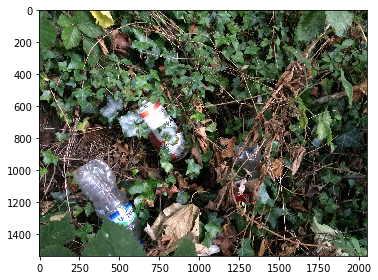

In [ ]:
# see single image 
from skimage import io
x=io.imread('/content/drive/MyDrive/FinalProjectData/Data/TACO/fotos/batch_1/000019.jpg')
io.imshow(x)

# **Input PIPELINE**

In [ ]:
IMG_SHAPE = 224
batch_size = 32

#normalize data using ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
# example of performing data augmentation on the fly 
# datagen = ImageDataGenerator(rotation_range = 45,
#                             width_shift_range = 0.1,
#                             height_shift_range = 0.1,
#                             zoom_range = 0.2,
#                             horizontal_flip = True,
#                             validation_split = 0.2)

#train/testsplit
train_generator = datagen.flow_from_dataframe(
    dataframe=answers_fixed[:1300],
    directory='/content/drive/MyDrive/FinalProjectData/Data/TACO/fotos',
    x_col='file_name',
    y_col=answers_fixed.columns.drop('file_name'),
    batch_size=batch_size, 
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(IMG_SHAPE,IMG_SHAPE))

test_generator = test_datagen.flow_from_dataframe(
    dataframe=answers_fixed[1300:],
    directory='/content/drive/MyDrive/FinalProjectData/Data/TACO/fotos',
    x_col="file_name",
    y_col=answers_fixed.columns.drop('file_name'),
    batch_size=batch_size, 
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(IMG_SHAPE,IMG_SHAPE))

Found 1299 validated image filenames.
Found 200 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
for item in train_generator:
  print(item)
  print(item[0].shape)
  print(item[1].shape)
  break

(array([[[[0.7137255 , 0.5882353 , 0.43529415],
         [0.5372549 , 0.42352945, 0.2901961 ],
         [0.6431373 , 0.5294118 , 0.39607847],
         ...,
         [0.1764706 , 0.18039216, 0.14901961],
         [0.15686275, 0.16078432, 0.12941177],
         [0.16470589, 0.1764706 , 0.13333334]],

        [[0.5803922 , 0.47058827, 0.31764707],
         [0.57254905, 0.454902  , 0.30588236],
         [0.5921569 , 0.47450984, 0.3254902 ],
         ...,
         [0.09411766, 0.08235294, 0.04705883],
         [0.10980393, 0.09803922, 0.0627451 ],
         [0.12156864, 0.1254902 , 0.10196079]],

        [[0.61960787, 0.5058824 , 0.3803922 ],
         [0.6862745 , 0.5686275 , 0.427451  ],
         [0.69803923, 0.5686275 , 0.43921572],
         ...,
         [0.14509805, 0.16078432, 0.10196079],
         [0.07843138, 0.09411766, 0.03529412],
         [0.12156864, 0.15686275, 0.09019608]],

        ...,

        [[0.65882355, 0.5176471 , 0.38431376],
         [0.9725491 , 0.86274517, 0.7176471 

In [ ]:
answers_fixed[answers_fixed.columns.drop('file_name')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   kategorie nan          1500 non-null   int8 
 1   Bottle                 1500 non-null   int8 
 2   Cup                    1500 non-null   int8 
 3   Unlabeled litter       1500 non-null   int8 
 4   Scrap metal            1500 non-null   int8 
 5   Straw                  1500 non-null   int8 
 6   Styrofoam piece        1500 non-null   int8 
 7   Food waste             1500 non-null   int8 
 8   Shoe                   1500 non-null   int8 
 9   Other plastic          1500 non-null   int8 
 10  Plastic container      1500 non-null   int8 
 11  Battery                1500 non-null   int8 
 12  Squeezable tube        1500 non-null   int8 
 13  Paper bag              1500 non-null   int8 
 14  Plastic glooves        1500 non-null   int8 
 15  Bottle cap             1500 non-null  

# Building the **Model**


In [ ]:
from tensorflow.keras.models import Model, load_model, Sequential 
from tensorflow.keras.optimizers import RMSprop, Adamax, Adam
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras import regularizers, optimizers


from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy

Sequential

In [ ]:
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(28, activation='sigmoid'))
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,decay=0.0001),
              loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

"""

'\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), padding=\'same\',\n                 input_shape=(224,224,3)))\nmodel.add(Activation(\'relu\'))\nmodel.add(Conv2D(32, (3, 3)))\nmodel.add(Activation(\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#model.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (3, 3), padding=\'same\'))\nmodel.add(Activation(\'relu\'))\nmodel.add(Conv2D(64, (3, 3)))\nmodel.add(Activation(\'relu\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#model.add(Dropout(0.25))\n\nmodel.add(Flatten())\nmodel.add(Dense(512))\nmodel.add(Activation(\'relu\'))\n#model.add(Dropout(0.5))\nmodel.add(Dense(28, activation=\'sigmoid\'))\nmodel.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,decay=0.0001),\n              loss= tf.keras.losses.CategoricalCrossentropy(),\n              metrics=["accuracy"])\n\n'

In [ ]:
#model.trainable = False

Data Augmentation

In [ ]:
#number of images generated = BATCH_SIZE
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal_and_vertical', seed=123),
                                         tf.keras.layers.RandomRotation(0.2, seed=123)])

ResNet50

In [ ]:
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow import keras
# #instantiate a base model with pre_trained weights

# base_model = keras.applications.ResNet50(
#     weights = 'imagenet',
#     input_shape = (224, 224, 3),
#     include_top = False
# )

In [ ]:
# #freeze it
# base_model.trainable = False

In [ ]:
# #create new model on top
# model = Sequential([base_model, keras.layers.Flatten(),
#                   keras.layers.Dense(1024, activation='relu'),
#                   keras.layers.Dense(512, activation='relu'),
#                   keras.layers.Dense(28, activation='softmax')])

# model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,decay=0.0001),
#               loss= tf.keras.losses.CategoricalCrossentropy(),
#               metrics=["accuracy"])


In [ ]:
#model.summary()

VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

# vgg16_model = tf.keras.applications.VGG16(
#     include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3))

In [ ]:
# vgg16_model.trainable = False

In [ ]:
# model = Sequential([vgg16_model, keras.layers.Flatten(),
#                    keras.layers.Dense(4096, activation='relu'),
#                    #keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#                    #keras.layers.MaxPooling2D(),
#                    #keras.layers.Flatten(),
#                    keras.layers.Dense(2048, activation='relu'),
#                    keras.layers.Dense(1024, activation='relu'),
#                    keras.layers.Dense(512, activation='relu'),
#                    keras.layers.Dense(28, activation='sigmoid')])


In [ ]:
# model.compile(tf.keras.optimizers.Adam(),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=["BinaryAccuracy"])

In [ ]:
#model.summary()

In [ ]:
#callback to save keras model (model is saved at and of epoch if its best seen so far)

EPOCHS = 40
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/FinalProjectData',
    save_weights_only=True,
    monitor='CategoricalAccuracy',
    mode='max',
    save_best_only=True)


In [ ]:
# model.fit_generator(generator=train_generator, epochs=40, callbacks=[model_checkpoint_callback])

In [ ]:
# test_generator.reset()
# pred = model.predict_generator(test_generator, verbose=1)

# **`VGG19`** 
extracts features from arbitrary **layer**

---



In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19

vgg19_model = keras.applications.VGG19(
    input_shape=(224, 224, 3),
    weights="imagenet",
    include_top=False)

vgg19_model.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19model = Sequential([vgg19_model, keras.layers.GlobalAvgPool2D(),
                   keras.layers.Dense(4096, activation='relu'),
                   keras.layers.Dense(2048, activation='relu'),
                   keras.layers.Dense(1024, activation='sigmoid'),
                   keras.layers.Dense(512, activation='sigmoid'),
                   keras.layers.Dense(256, activation='sigmoid'),
                   keras.layers.Dense(28, activation='sigmoid')])

METRICS = [keras.metrics.BinaryAccuracy(name='biaccuracy'),
           keras.metrics.Accuracy(name='accuracy'),
          #  keras.metrics.TruePositives(name='tp'),
           keras.metrics.FalsePositives(name='fp'),
          #  keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn')]
          # keras.metrics.Precision(name='precision')]




In [ ]:
vgg19model.compile(optimizer=keras.optimizers.Adamax(learning_rate=1e-2),#(learning_rate=1e-3),
              loss=keras.losses.BinaryCrossentropy(),#(BinaryCrossentropy)
              metrics=[tf.keras.metrics.CategoricalAccuracy(), METRICS])

In [ ]:
hist = vgg19model.fit_generator(generator=train_generator, epochs=50)#, callbacks=[model_checkpoint_callback])

In [ ]:
test_generator.reset()
pred = vgg19model.predict_generator(test_generator, verbose=1)

In [ ]:
vgg19model.summary()

# Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception

In [ ]:
X_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    classes=1000)

X_model.trainable = False

In [ ]:
X_model = Sequential([X_model, keras.layers.Flatten(),
                   keras.layers.Dense(4096, activation='relu'),
                   keras.layers.Dense(2048, activation='relu'),
                   keras.layers.Dense(1024, activation='relu'),
                   keras.layers.Dense(512, activation='sigmoid'),
                   keras.layers.Dense(256, activation='sigmoid'),
                   keras.layers.Dense(28, activation='sigmoid')])

METRICS = [keras.metrics.BinaryAccuracy(name='biaccuracy'),
           keras.metrics.Accuracy(name='accuracy'),
          #  keras.metrics.TruePositives(name='tp'),
           keras.metrics.FalsePositives(name='fp'),
          #  keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn')]
          # keras.metrics.Precision(name='precision')]

In [ ]:
X_model.compile(optimizer=keras.optimizers.Adamax(learning_rate=1e-2),#(learning_rate=1e-3),
              loss=keras.losses.BinaryCrossentropy(),#(BinaryCrossentropy)
              metrics=[tf.keras.metrics.CategoricalAccuracy(), METRICS])

In [ ]:
XGhist = X_model.fit_generator(generator=train_generator, epochs=100)#, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
41/41 [==============================] - 888s 21s/step - loss: 0.2357 - categorical_accuracy: 0.1386 - biaccuracy: 0.9313 - accuracy: 0.0000e+00 - fp: 0.0000e+00 - fn: 2497.0000
Epoch 2/100
41/41 [==============================] - 152s 4s/step - loss: 0.2187 - categorical_accuracy: 0.1386 - biaccuracy: 0.9313 - accuracy: 0.0000e+00 - fp: 0.0000e+00 - fn: 2497.0000
Epoch 3/100
41/41 [==============================] - 152s 4s/step - loss: 0.2191 - categorical_accuracy: 0.1363 - biaccuracy: 0.9313 - accuracy: 0.0000e+00 - fp: 0.0000e+00 - fn: 2497.0000
Epoch 4/100
41/41 [==============================] - 152s 4s/step - loss: 0.2186 - categorical_accuracy: 0.1355 - biaccuracy: 0.9313 - accuracy: 0.0000e+00 - fp: 0.0000e+00 - fn: 2497.0000
Epoch 5/100
41/41 [==============================] - 152s 4s/step - loss: 0.2184 - categorical_accuracy: 0.1601 - biaccuracy: 0.9313 - accuracy: 0.0000e+00 - fp: 0.0000e+00 - fn: 2497.0000
Epoch 6/100
41/41 [==============================] - 1

In [ ]:
test_generator.reset()
predxg = X_model.predict_generator(test_generator, verbose=1)

NameError: ignored

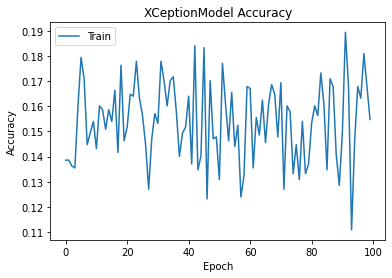

KeyError: ignored

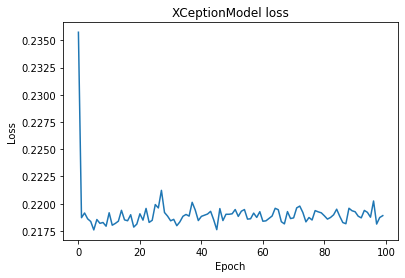

In [ ]:
# Plot training & test accuracy values
import matplotlib.pyplot as plt

plt.plot(XGhist.history['categorical_accuracy'])
#plt.plot(XGhist.history['val_accuracy'])
plt.title('XCeptionModel Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(XGhist.history['loss'])
#plt.plot(XGhist.history['val_loss'])
plt.title('XCeptionModel loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')

plt.plot(XGhist.history['lr'], label='Learning rate', color='#000', lw=3, linestyle='--')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.show()

In [ ]:
XGhist.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'biaccuracy', 'accuracy', 'fp', 'fn'])

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

InceptionV3 = tf.keras.applications.InceptionV3(include_top=False,
                                               weights="imagenet",
                                               input_tensor=None,
                                               input_shape=None,
                                               pooling=None,
                                               classes=1000)

InceptionV3.trainable = False



87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
inc_model = Sequential([InceptionV3, data_augmentation,
                   keras.layers.GlobalAvgPool2D(),
                   keras.layers.Dense(4096, activation='relu'),
                   keras.layers.Dense(2048, activation='relu'),
                   keras.layers.Dense(1024, activation='sigmoid'),
                   keras.layers.Dense(512, activation='sigmoid'),
                   keras.layers.Dense(256, activation='sigmoid'),
                   keras.layers.Dense(28, activation='sigmoid')])

In [ ]:
inc_model.compile(optimizer=keras.optimizers.Adamax(learning_rate=1e-2),#(learning_rate=1e-3),
              loss=keras.losses.BinaryCrossentropy(),#(BinaryCrossentropy)
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
Inchist = inc_model.fit_generator(generator=train_generator, epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
41/41 [==============================] - 684s 16s/step - loss: 0.2382 - categorical_accuracy: 0.1032
Epoch 2/100
41/41 [==============================] - 152s 4s/step - loss: 0.2181 - categorical_accuracy: 0.1062
Epoch 3/100
41/41 [==============================] - 152s 4s/step - loss: 0.2175 - categorical_accuracy: 0.1155
Epoch 4/100
41/41 [==============================] - 152s 4s/step - loss: 0.2173 - categorical_accuracy: 0.1132
Epoch 5/100
41/41 [==============================] - 152s 4s/step - loss: 0.2182 - categorical_accuracy: 0.1093
Epoch 6/100
41/41 [==============================] - 153s 4s/step - loss: 0.2180 - categorical_accuracy: 0.1224
Epoch 7/100
41/41 [==============================] - 152s 4s/step - loss: 0.2181 - categorical_accuracy: 0.1024
Epoch 8/100
41/41 [==============================] - 152s 4s/step - loss: 0.2182 - categorical_accuracy: 0.1139
Epoch 9/100
41/41 [==============================] - 151s 4s/step - loss: 0.2176 - categorical_accuracy

Visualizing Trainging Results...

In [ ]:
#check example on visualizing flowers with sequential in keras (history = )

In [ ]:
predictions = pred.astype(int)
columns=["kategorie nan",	"Paper", "Glass jar",	"Shoe",	"Rope & strings",	"Other plastic",	"Blister pack",	"Plastic glooves",	"Aluminium foil",	"Food waste",	"Unlabeled litter",	"Squeezable tube",	"Bottle cap",	"Cup",	"Broken glass",	"Plastic container",	"Plastic bag & wrapper",	"Plastic utensils",	"Scrap metal",	"Battery",	"Carton",	"Straw",	"Paper bag",	"Can",	"Styrofoam piece",	"Pop tab",	"Bottle",	"Lid"]
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
#results.to_csv("results.csv",index=False)

In [ ]:
results.value_counts('Unlabeled litter')

In [ ]:
# Plot training & test accuracy values
import matplotlib.pyplot as plt

plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['validation_accuracy'])
plt.title('Vgg19Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Vgg19Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')

plt.plot(hist.history['lr'], label='Learning rate', color='#000', lw=3, linestyle='--')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.show()